<a href="https://colab.research.google.com/github/DavidRamosArchilla/Colorizing-images/blob/main/image_colorization_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make sure that GPU is enabled

To do that, go to `Runtime > Change Runtime type`
- `Hardware Accelerator > GPU`

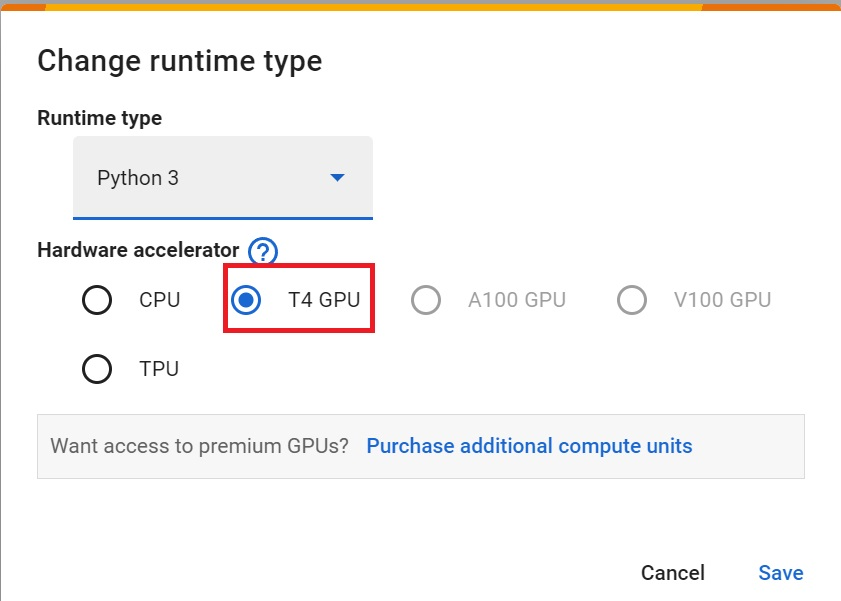

# Clone the repo and import the required libraries

In [1]:
!git clone https://github.com/DavidRamosArchilla/Colorizing-images.git

Cloning into 'Colorizing-images'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 3), reused 15 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 717.49 KiB | 1.95 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
%cd Colorizing-images

/content/Colorizing-images


In [3]:
from utils import visualize_results
import torch
import numpy as np
from models import ColorizingNet
from utils import ColirizationDataset
from PIL import Image
from torchvision import transforms
import os
import matplotlib.pyplot as plt

# Download the pretrained model from Huggingface Hub and load the weights

In [4]:
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(
    repo_id="davidramos/image-colorization",
    filename="model.pth"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.pth:   0%|          | 0.00/229M [00:00<?, ?B/s]

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ColorizingNet(device)
model.load_state_dict(torch.load(model_path))

<ipython-input-5-5b99e367a448>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


<All keys matched successfully>

# Download test data

In [6]:
!mkdir data

In [7]:
from download_datasets import download_coco
download_coco('data', 'val')

data/val2017.zip: 100%|██████████| 778M/778M [00:15<00:00, 53.2MiB/s]


Extracting files...


## Create the dataloaders

In [8]:
val_dir = 'data/val2017'
transformation = transforms.Compose([
    transforms.Resize((256, 256), Image.BICUBIC),
    transforms.ToTensor(),
])
imgs_val = np.random.choice(os.listdir(val_dir), 1000).tolist()
imgs_val = [os.path.join(val_dir, img) for img in imgs_val]
val_dataset = ColirizationDataset(imgs_val, transformation)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=True)

# And finally, try the model!

<Figure size 2000x2000 with 0 Axes>

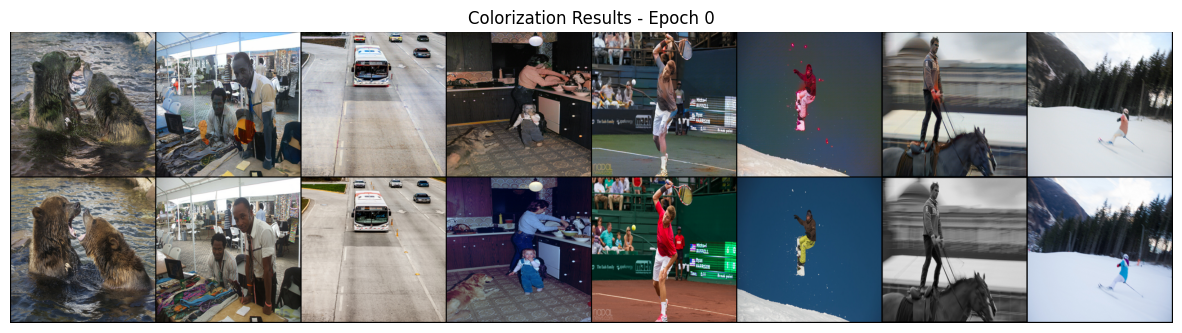

In [10]:
visualize_results(model, val_loader, device, 0, show=True, num_images=8)